In [251]:
#Se crea una estructura de un dataframe para cargar los datos
import pandas as pd   
# Permite cargar el modelo logistica de regresión
from sklearn.linear_model import LogisticRegression 

In [252]:
#se define un data frame para cargar el archivo que contiene los datos de entrenamiento
dfNetwork = pd.read_csv("/Machine Learning/Data/trafficunicor_ml_2mw.csv")
#se muestra el dataframe
dfNetwork.head()

,src_ip,dst_ip,src_port,dst_port,bidirectional_first_seen_ms,bidirectional_last_seen_ms,bidirectional_bytes,target_traffic,size_traffic
0,172.16.40.180,172.16.40.1,51954,161,1651680236239,1651680236283,3038,1,44874052
1,172.16.40.180,172.16.40.1,51954,161,1651680236283,1651680236364,686,1,44874052
2,172.16.40.180,172.16.40.6,51954,161,1651680236279,1651680236365,2175,0,9667864
3,172.16.40.180,172.16.40.1,51954,161,1651680236364,1651680236367,690,1,44874052
4,172.16.40.180,172.16.40.2,51954,161,1651680236239,1651680236420,3310,0,41211180


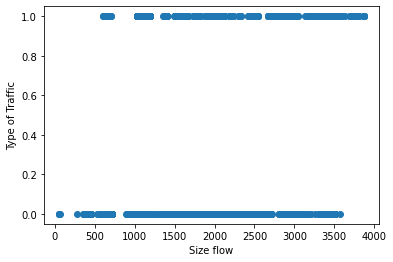

In [253]:
#Se visualiza en una gráfico de dispersión presencia de arañas y tamaño de los granos de arena
import matplotlib.pyplot as plott
%matplotlib inline
plott.ylabel('Type of Traffic')
plott.xlabel('Size flow')
plott.scatter(dfNetwork['bidirectional_bytes'],dfNetwork['target_traffic'])

In [254]:
#Se elimina los espacios al principio y al final de la cadena:
#en el eventual caso de que los hubiera
dfNetwork.columns=dfNetwork.columns.str.strip()

In [255]:
#Se almacena en la variable inputs la variables independientes y en mytarget la variable dependiente
inputs_X=dfNetwork.drop('src_ip', axis='columns')
# Se elimina la columna id, debido a que no es relevante
inputs_X=dfNetwork.drop('dst_ip', axis='columns')

In [256]:
#En X se separan las variables independientes, en este caso el tamo de los granos de arena
#X= dfNetwork[['src_port','dst_port','bidirectional_first_seen_ms','bidirectional_last_seen_ms','bidirectional_bytes']]
X= dfNetwork[['src_port','dst_port','bidirectional_bytes','size_traffic']]

X                 
#En y se asigna la variable dependiente que en este caso presencia de arañas (donde 1 indicia que hay arañas y 0 no hay arañas)
y=dfNetwork['target_traffic']
#Se visualizan las variables independientes 
X.head()

,src_port,dst_port,bidirectional_bytes,size_traffic
0,51954,161,3038,44874052
1,51954,161,686,44874052
2,51954,161,2175,9667864
3,51954,161,690,44874052
4,51954,161,3310,41211180


In [257]:
#train_test_split permite la separación de datos de entrenamiento y pruebas
from sklearn.model_selection import train_test_split
#Se dividen los datos en en entrenamiento y pruebas, además se define mediante test_size=0.2 el porcentaje para pruebas
#También se puede definir de forma aleatoria que datos se utilizarán para el entrenamiento mediante random_state=10
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=30)

In [258]:
#Permite viusalizar información del dataframe
dfNetwork.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44775 entries, 0 to 44774
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   src_ip                       44775 non-null  object
 1   dst_ip                       44775 non-null  object
 2   src_port                     44775 non-null  int64 
 3   dst_port                     44775 non-null  int64 
 4   bidirectional_first_seen_ms  44775 non-null  int64 
 5   bidirectional_last_seen_ms   44775 non-null  int64 
 6   bidirectional_bytes          44775 non-null  int64 
 7   target_traffic               44775 non-null  int64 
 8   size_traffic                 44775 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 3.1+ MB


In [259]:
#permite mostrar estadísticas del resumen de las variables numéricas
round(dfNetwork.describe(),2)

,src_port,dst_port,bidirectional_first_seen_ms,bidirectional_last_seen_ms,bidirectional_bytes,target_traffic,size_traffic
count,44775.00,44775.00,4.477500e+04,4.477500e+04,44775.00,44775.00,44775.00
mean,26069.03,25582.92,1.651680e+12,1.651680e+12,810.82,0.04,14229285.94
std,25898.17,25893.30,1.019586e+05,1.018129e+05,437.15,0.20,10806028.13
min,0.00,0.00,1.651680e+12,1.651680e+12,54.00,0.00,60.00
25%,161.00,161.00,1.651680e+12,1.651680e+12,645.00,0.00,7077607.00
50%,51410.00,161.00,1.651680e+12,1.651680e+12,649.00,0.00,10722664.00
75%,51954.00,51954.00,1.651681e+12,1.651681e+12,667.00,0.00,14980142.00
max,52501.00,52455.00,1.651681e+12,1.651681e+12,3869.00,1.00,44875729.00


In [260]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#scaler.fit_transform se utiliza para el ajuste  de parámetros iniciales de acuerdo al conjunto de datos de entrenamiento
#además devuelve la trnasformada
X_train = scaler.fit_transform(X_train)
#scaler.transform se utiliza para para calcular la media y la desviación estándar en un conjunto de entrenamiento para poder volver a aplicar más tarde,
#la misma transformación en el conjunto de prueba.
X_test = scaler.transform(X_test)

In [261]:
#X_train

In [262]:
y_train

16940    0
6872     0
2939     0
28836    0
14605    0
        ..
30517    0
919      0
33268    0
4517     0
38693    0
Name: target_traffic, Length: 35820, dtype: int64

In [263]:
#Permite conocer cuantas variables se van a utilizar
cols=X.columns

In [264]:
#Se define a los datos de entrenamiento el número de columnas del dataframe que corresponden a las variables independientes
X_train = pd.DataFrame(X_train, columns=[cols])

In [265]:
#Visualiza las estadísticas del las diferentes variables independientes
X_train.describe()

,src_port,dst_port,bidirectional_bytes,size_traffic
count,3.582000e+04,3.582000e+04,3.582000e+04,3.582000e+04
mean,-1.705937e-17,1.745610e-17,6.823749e-17,4.205334e-17
std,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00
min,-1.003697e+00,-9.906860e-01,-1.720004e+00,-1.315483e+00
25%,-9.974801e-01,-9.844684e-01,-3.830761e-01,-6.626530e-01
50%,-9.974801e-01,-9.844684e-01,-3.740276e-01,-3.264176e-01
75%,1.002407e+00,1.015702e+00,-3.333089e-01,6.631018e-02
max,1.023528e+00,1.034819e+00,6.910081e+00,2.824005e+00


In [321]:
from sklearn.linear_model import LogisticRegression 
# Se importa el clasificador SVC
from sklearn.svm import SVC
#Se importa el modelo de predicción de bosque aleatorio
from sklearn.ensemble import RandomForestClassifier
#Se importa el modelo de predicción de Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
modelreg=LogisticRegression()
modelreg.fit(X_train,y_train)

LogisticRegression()

In [322]:
#Permite la normalización de los datos de entrenamiento  normalmente distribuidos estándar: Gaussian con media cero y varianza de unidad
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=3)

In [323]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [324]:
def get_score(model, X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    return model.score(X_test,y_test)

In [325]:
get_score(LogisticRegression(),X_train,X_test,y_train,y_test)

0.950642099385818

In [326]:
get_score(SVC(),X_train,X_test,y_train,y_test)

0.9683975432719152

In [327]:
get_score(RandomForestClassifier(),X_train,X_test,y_train,y_test)

1.0

In [328]:
get_score(GaussianNB(),X_train,X_test,y_train,y_test)

0.9683975432719152

In [329]:
from sklearn import preprocessing
# Se importa el clasificador SVC
from sklearn.svm import SVC
#Se importa el modelo de predicción de bosque aleatorio
from sklearn.ensemble import RandomForestClassifier
#Se importa el modelo de predicción de Naive Bayes
from sklearn.naive_bayes import GaussianNB

lg_score = []
svm_score = []
rf_score = []
nby_score = []
lda_score = []
knc_score = []
dtree_score = []
for train_index,test_index in kf.split(X):
    X_train,X_test=X.iloc[train_index,:],X.iloc[test_index,:]
    #scale preprocesa los datos para ser normalizados posteriormente
    scaler = preprocessing.StandardScaler().fit(X_train)
    y_train,y_test=y[train_index],y[test_index]
    #Normaliza los datos
    X_scaled = scaler.transform(X_train)
    lg_score.append(get_score(LogisticRegression(),X_scaled,X_test,y_train,y_test))
    svm_score.append(get_score(SVC(),X_train,X_test,y_train,y_test))
    rf_score.append(get_score(RandomForestClassifier(n_estimators=20),X_train,X_test,y_train,y_test))
    nby_score.append(get_score(GaussianNB(),X_train,X_test,y_train,y_test))
    lda_score.append(get_score(LinearDiscriminantAnalysis(),X_train,X_test,y_train,y_test))
    knc_score.append(get_score(KNeighborsClassifier(n_neighbors=7, algorithm='kd_tree'),X_train,X_test,y_train,y_test))
    dtree_score.append(get_score(DecisionTreeClassifier(criterion='entropy'),X_train,X_test,y_train,y_test))

c:\users\jegjo\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\users\jegjo\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\users\jegjo\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\users\jegjo\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\users\jegjo\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [330]:
lg_score

[0.0964824120603015,
 0.047571189279731994,
 0.02367392518146287,
 0.016080402010050253,
 0.024120603015075376]

In [331]:
svm_score

[0.9683975432719152,
 0.9797878280290341,
 0.9819095477386934,
 0.9912897822445561,
 0.9746510329424902]

In [332]:
rf_score

[1.0, 1.0, 1.0, 1.0, 1.0]

In [333]:
nby_score

[0.9683975432719152,
 0.9797878280290341,
 0.9819095477386934,
 0.9912897822445561,
 0.9746510329424902]

In [344]:
lda_score

[0.9357900614182021,
 0.9558905639307649,
 0.9633724176437745,
 0.9840312674483529,
 0.9486320491345617]

In [345]:
knc_score

[1.0, 1.0, 1.0, 1.0, 1.0]

In [346]:
dtree_score

[1.0, 1.0, 1.0, 1.0, 1.0]

In [334]:
from sklearn.model_selection import cross_val_score
cross_val_score(SVC(),X_train,y_train)

array([0.96133445, 0.98953099, 0.97082635, 0.98813512, 0.99190396])

In [335]:
cross_val_score(LogisticRegression(),X_train,y_train)

array([0.9586823 , 0.98492462, 0.95505304, 0.9725014 , 0.97710776])

In [336]:
cross_val_score(RandomForestClassifier(n_estimators=40),X_train,y_train)

array([1., 1., 1., 1., 1.])

In [337]:
cross_val_score(GaussianNB(),X_train,y_train)

array([0.96133445, 0.98953099, 0.97082635, 0.98813512, 0.99190396])

In [349]:
cross_val_score(LinearDiscriminantAnalysis(),X_train,y_train)

array([0.92197097, 0.97571189, 0.93927973, 0.97696817, 0.98492462])

In [354]:

cross_val_score(KNeighborsClassifier(),X_train,y_train)

array([1., 1., 1., 1., 1.])

In [355]:
cross_val_score(DecisionTreeClassifier(),X_train,y_train)

array([1., 1., 1., 1., 1.])

In [338]:
#Se importa el modelo de predicción de bosque aleatorio
from sklearn.ensemble import RandomForestClassifier
#Se instancia el modelo de clasificación
model = RandomForestClassifier()
#Al modelo se le pasan los parámetros de entrenamiento
model.fit(X_train,y_train)

RandomForestClassifier()

In [356]:
#Se visualizan las predicciones de acuerdo al dataset de prueba
y_predicted = model.predict(X_test)
y_predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [357]:
#Se utiliza la matriz de confusión para observar las aproximaciones del modelo
from sklearn.metrics import  confusion_matrix
cm= confusion_matrix(y_test,y_predicted)
cm

array([[8747,    0],
       [   0,  208]], dtype=int64)

Text(69.0, 0.5, 'Verdadero')

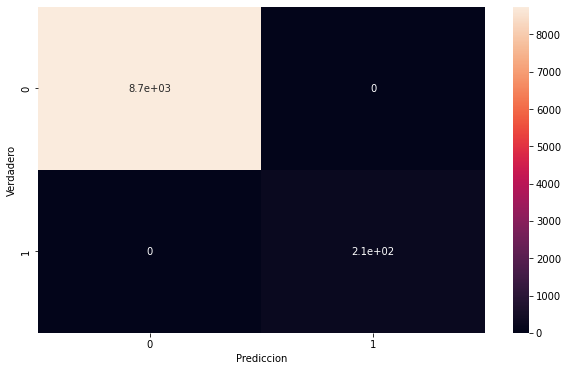

In [358]:
#seaborn es una biblioteca para hacer gráficos estadísticos
#Si tiene problemas para ejecutar seaborn ejecute la siguiente instruccion: pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,6))
sn.heatmap(cm,annot=True)
plt.xlabel('Prediccion')
plt.ylabel('Verdadero')

In [359]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predicted)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[8747    0]
 [   0  208]]

True Positives(TP) =  8747

True Negatives(TN) =  208

False Positives(FP) =  0

False Negatives(FN) =  0


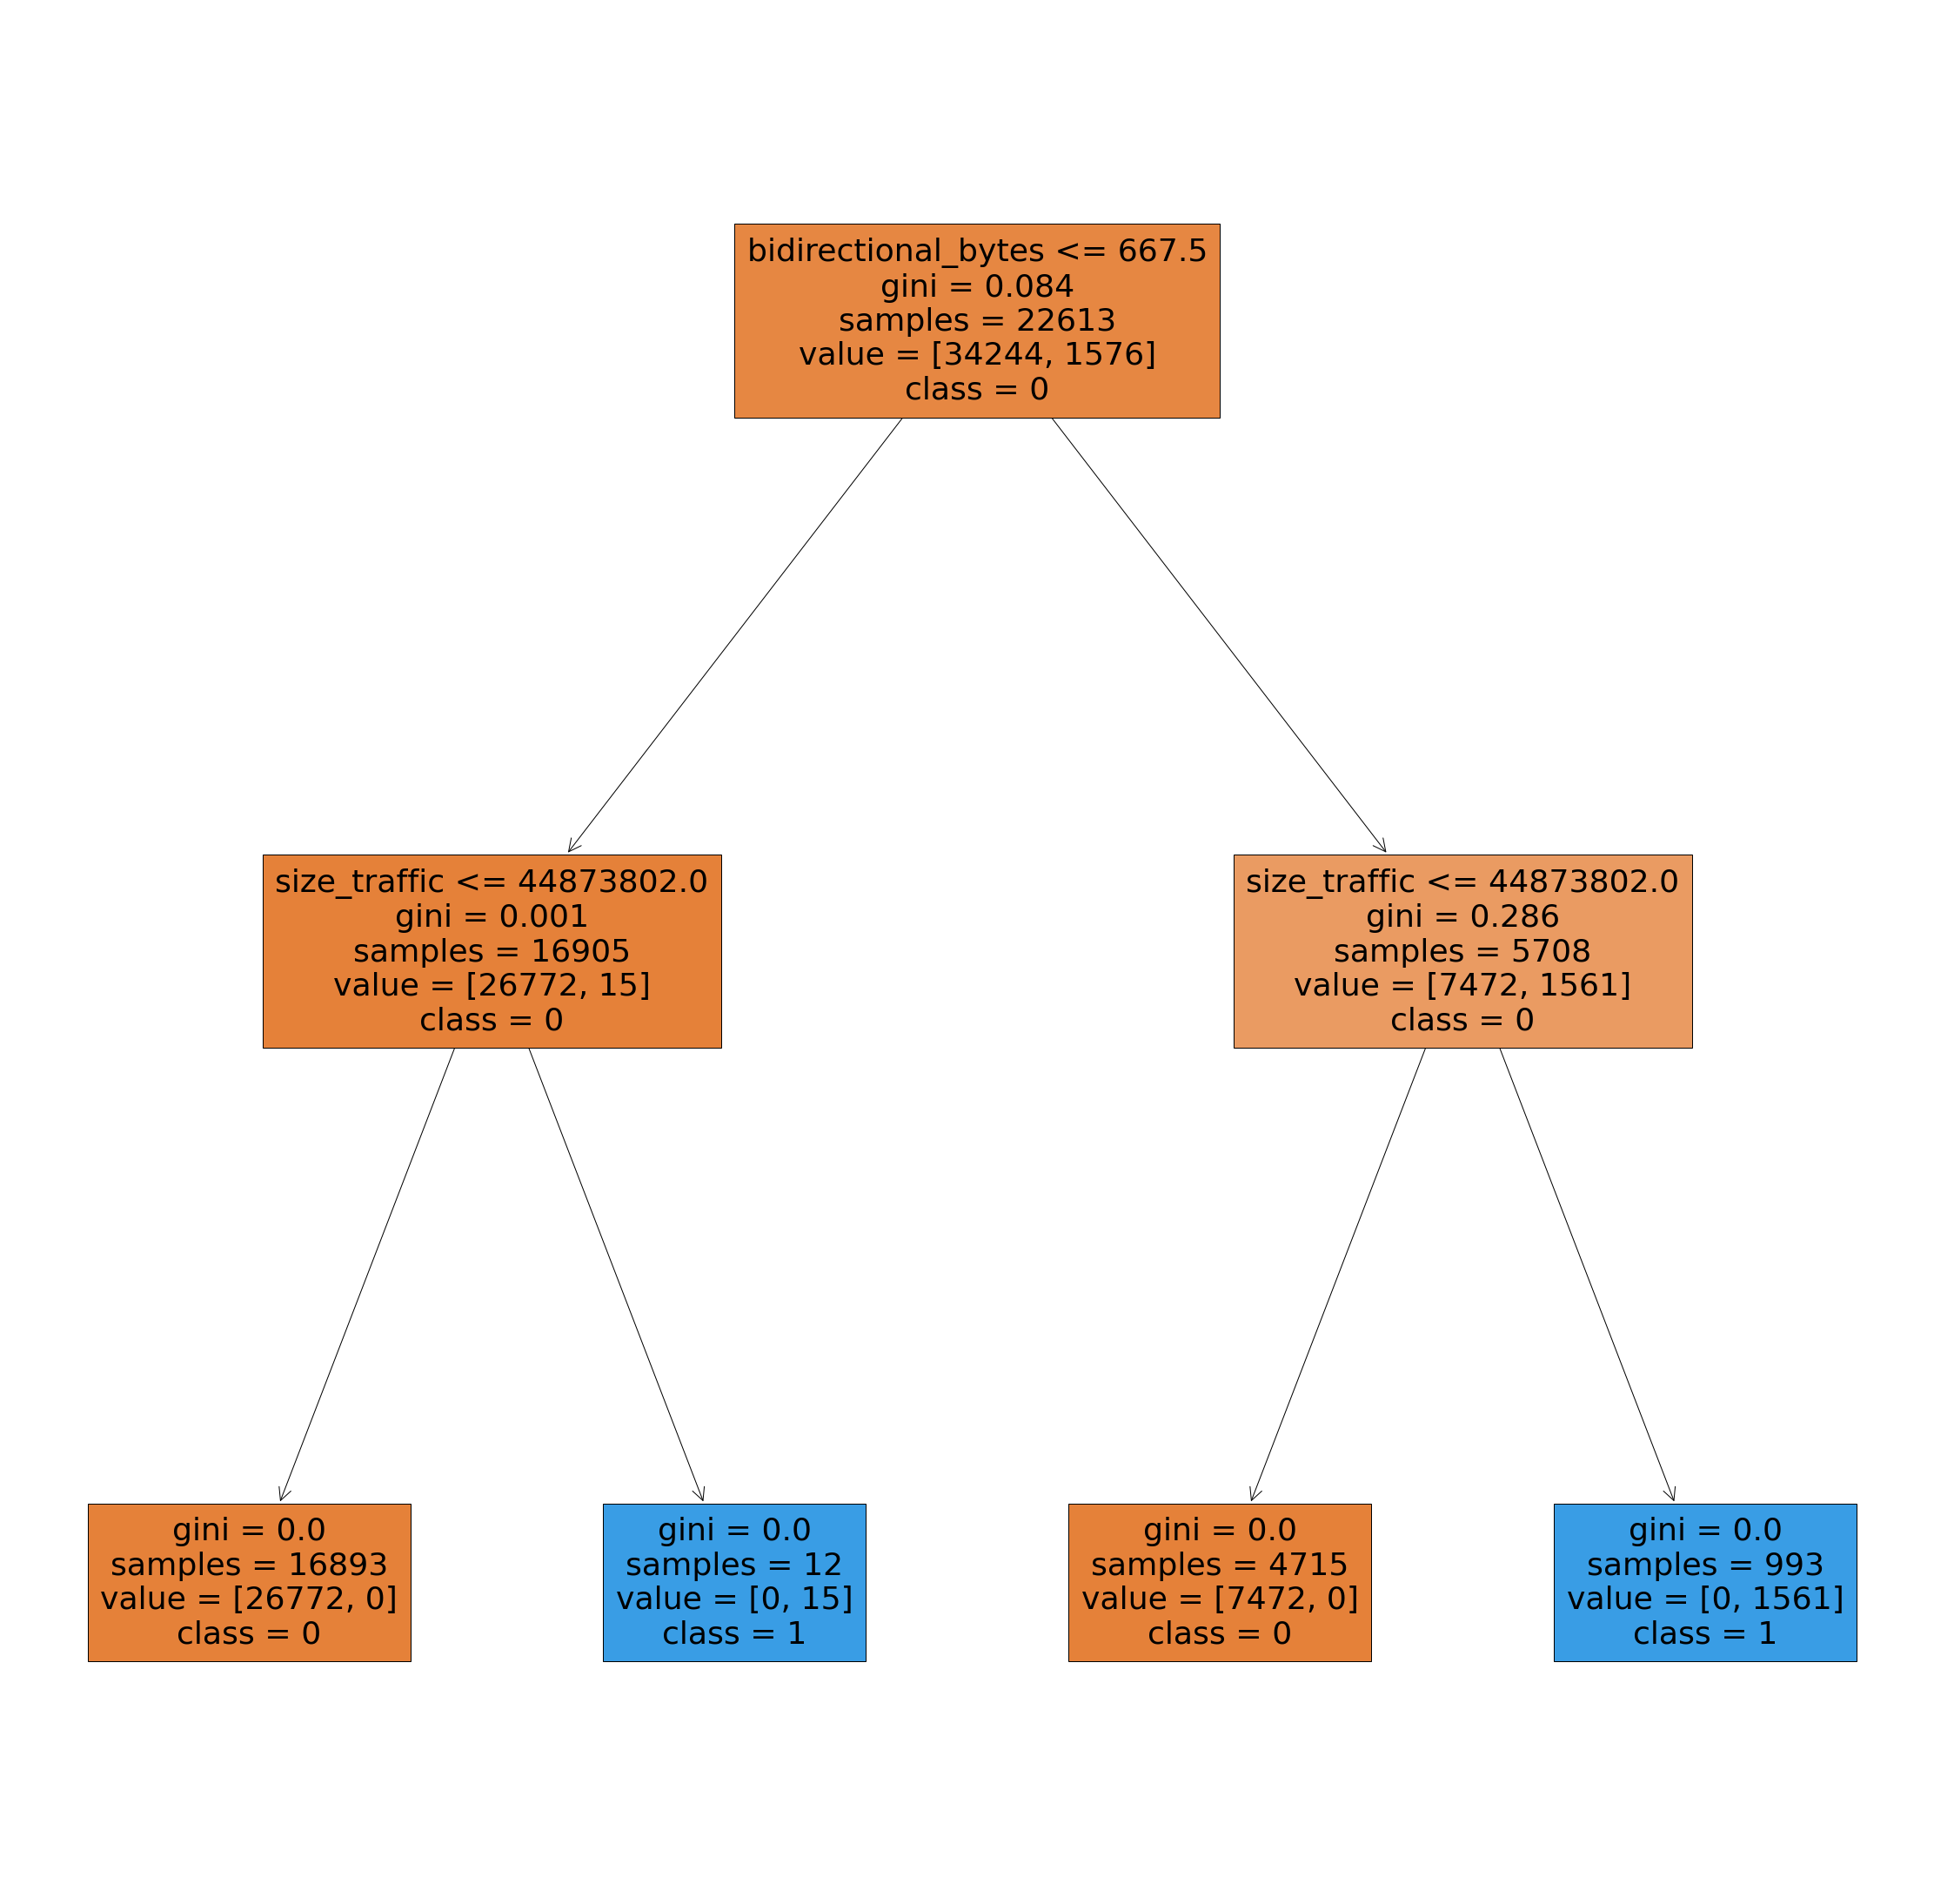

In [360]:
#Se viualiza de forma gráfica la estimación del bosque aleatorio mediante
#un árbol de decisión
from sklearn.tree import plot_tree
plt.figure(figsize=(40,40))
plot_tree(model.estimators_[4], feature_names = X_train.columns,class_names=["0", "1"],filled=True);

In [361]:
dfNetwork.target_traffic.value_counts()

0    42957
1     1818
Name: target_traffic, dtype: int64

array([[<AxesSubplot:title={'center':'src_port'}>,
        <AxesSubplot:title={'center':'dst_port'}>],
       [<AxesSubplot:title={'center':'bidirectional_bytes'}>,
        <AxesSubplot:title={'center':'size_traffic'}>]], dtype=object)

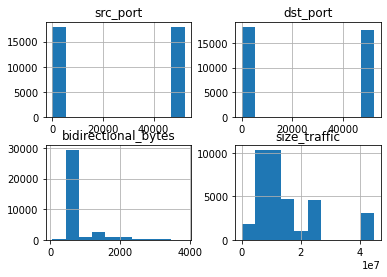

In [362]:
%matplotlib inline
X_train.hist()

In [364]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8747
           1       1.00      1.00      1.00       208

    accuracy                           1.00      8955
   macro avg       1.00      1.00      1.00      8955
weighted avg       1.00      1.00      1.00      8955



In [366]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [367]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0000


In [368]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 1.0000


In [369]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 1.0000


In [370]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 1.0000


In [371]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0000


In [372]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 1.0000


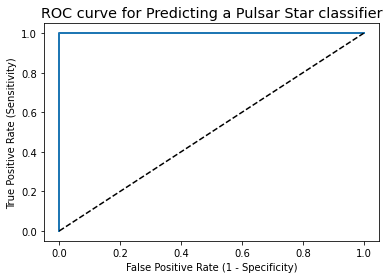

In [374]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_predicted)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting a Pulsar Star classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [376]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_predicted)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 1.0000


In [380]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(model, X_train, y_train, cv=10, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 1.0000
